In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
tracks_dataset = pd.read_csv("Group_18_data_cleaned.csv") #read the excel file 
tracks_dataset.head()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."


In [3]:
tracks_dataset.shape

(4759, 14)

In [4]:
X = tracks_dataset[['body_roll','body_pitch','body_yaw','head_roll','head_pitch','head_yaw']]
X

,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,0.3,-0.71,190.56,-0.25,-1.09,186.37
1,0.3,-0.71,190.56,-0.25,-1.09,186.37
2,0.3,-0.71,190.56,-0.25,-1.09,186.37
3,0.3,-0.71,190.56,-0.25,-1.09,186.37
4,0.3,-0.71,190.56,-0.25,-1.09,186.37
...,...,...,...,...,...,...
4754,0.3,-0.71,190.56,-0.25,-1.09,186.37
4755,0.3,-0.71,190.56,-0.25,-1.09,186.37
4756,0.3,-0.71,190.56,-0.25,-1.09,186.37
4757,0.3,-0.71,190.56,-0.25,-1.09,186.37


In [5]:
from sklearn.preprocessing import MinMaxScaler
col = X.columns
col

scaler = MinMaxScaler()

for column in col:
    scaler.fit(X[[column]])
    X[column] = scaler.transform(X[[column]])
X

,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
1,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
2,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
3,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
...,...,...,...,...,...,...
4754,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4755,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4756,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761
4757,0.410112,0.690168,0.532291,0.593075,0.540117,0.518761


PCA - PRINCIPLE COMPONENT ANALYSIS

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components = 2)

In [8]:
pca.fit(X)

PCA(n_components=2)

In [9]:
x_pca =  pca.transform(X)

In [10]:
x_pca

array([[2.13006989e-06, 2.48370749e-05],
       [2.13006989e-06, 2.48370749e-05],
       [2.13006989e-06, 2.48370749e-05],
       ...,
       [2.13006989e-06, 2.48370749e-05],
       [2.13006989e-06, 2.48370749e-05],
       [2.13006989e-06, 2.48370749e-05]])

In [11]:
X.shape

(4759, 6)

In [12]:
x_pca.shape

(4759, 2)

In [13]:
y = X['head_yaw']
y

0       0.518761
1       0.518761
2       0.518761
3       0.518761
4       0.518761
          ...   
4754    0.518761
4755    0.518761
4756    0.518761
4757    0.518761
4758    0.518761
Name: head_yaw, Length: 4759, dtype: float64

Text(0, 0.5, 'Second component')

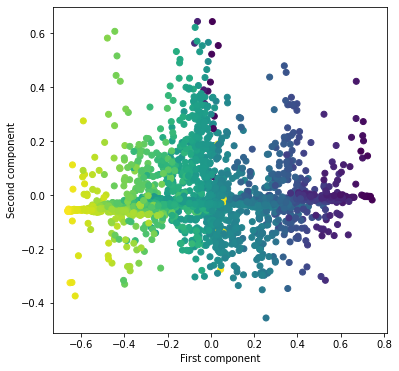

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel('First component')
plt.ylabel('Second component')

SOM - SELF ORGANIZING MAPS

In [15]:
from minisom import MiniSom

In [16]:
som = MiniSom( x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5, neighborhood_function='gaussian', random_seed=0)

In [17]:
scaled_data = X.to_numpy()
scaled_data
som.random_weights_init(scaled_data)

In [18]:
som.train_random(data = scaled_data, num_iteration = 100)

In [19]:
scaled_y = y.to_numpy()
scaled_y = list(map(int, scaled_y))

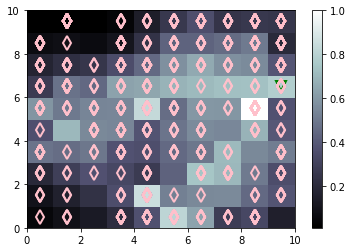

In [20]:
# making a self organization map 
from pylab import bone, pcolor, colorbar, plot, show 
bone() 
pcolor(som.distance_map().T) 
colorbar() 
markers = ["d", "v", "s", "*", "^"] 
colors = ['pink', 'green', 'cyan', 'yellow', 'orange'] 
for i, x in enumerate(scaled_data):
    W = som.winner(x) 
    plot(W[0] + 0.5,
    W[1] + 0.5, markers[scaled_y[i]], markeredgecolor = colors [scaled_y[i]], markerfacecolor = 'None', markersize = 10,
    markeredgewidth = 2) 
show()

In [21]:
label_names = [0]
label_names

[0]

In [22]:
# w_x, w_y = zip(*[som.winner(d) for d in scaled_data])
# w_x = np.array(w_x)
# w_y = np.array(w_y)

# colors = ['pink'] 
# plt.figure(figsize=(8, 6))
# plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
# plt.colorbar()

# for c in np.unique(scaled_y):
#     idx_target = scaled_y==c
#     plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
#                 w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
#                 s=50, c=colors[c-1], label=label_names[c])
# plt.legend(loc='upper right')
# plt.grid()
# # plt.savefig('resulting_images/som_seed.png')
# plt.show()

In [23]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [24]:
X = tracks_dataset[['body_roll','body_pitch','body_yaw','head_roll','head_pitch']]
X

y = tracks_dataset['head_yaw']

In [25]:
# train and test split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(3807, 5) (3807,) (952, 5) (952,)


In [26]:
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner
# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [27]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(7.5*10e3)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [28]:
train_x_norm = minmax_scaler(train_x) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Iteration:  55000
Iteration:  56000
I

In [30]:
# collecting labels

label_data = train_y.to_numpy()
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

sample data:  1000
sample data:  2000
sample data:  3000


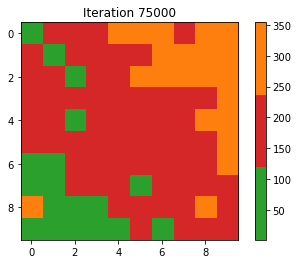

In [31]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()